In [173]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [174]:
# Load Dataset
df = pd.read_csv('/content/TRADES_CopyTr_90D_ROI.csv')

In [175]:
import ast
# Create DataFrame
df = pd.DataFrame(df)

# Check for NaN values
print("NaN values in Trade_History before handling:", df['Trade_History'].isna().sum())

# Fill NaN values with an empty list
df['Trade_History'] = df['Trade_History'].fillna("[]")  # Use "[]" for a safe conversion

# Convert string representations of lists/dicts into actual lists/dicts
df['Trade_History'] = df['Trade_History'].apply(ast.literal_eval)

# Explode the Trade_History to separate rows
df_exploded = df.explode('Trade_History')

# Normalize the Trade_History dictionaries into separate columns
trade_history_df = pd.json_normalize(df_exploded['Trade_History'])

# Combine with Port_IDs
final_df = pd.concat([df_exploded['Port_IDs'].reset_index(drop=True), trade_history_df.reset_index(drop=True)], axis=1)

NaN values in Trade_History before handling: 1


In [176]:
# Display the resulting DataFrame
final_df

,Port_IDs,time,symbol,side,price,fee,feeAsset,quantity,quantityAsset,realizedProfit,realizedProfitAsset,baseAsset,qty,positionSide,activeBuy
0,3925368433214965504,1.718900e+12,SOLUSDT,BUY,132.537000,-0.994027,USDT,1988.055000,USDT,0.0,USDT,SOL,15.0,LONG,True
1,3925368433214965504,1.718900e+12,DOGEUSDT,BUY,0.121820,-0.279796,USDT,1398.980880,USDT,0.0,USDT,DOGE,11484.0,LONG,False
2,3925368433214965504,1.718900e+12,DOGEUSDT,BUY,0.121820,-0.039494,USDT,197.470220,USDT,0.0,USDT,DOGE,1621.0,LONG,False
3,3925368433214965504,1.718900e+12,DOGEUSDT,BUY,0.121820,-0.008284,USDT,16.567520,USDT,0.0,USDT,DOGE,136.0,LONG,True
4,3925368433214965504,1.718900e+12,DOGEUSDT,BUY,0.121820,-0.046109,USDT,92.217740,USDT,0.0,USDT,DOGE,757.0,LONG,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211273,3768170840939476993,1.718550e+12,JASMYUSDT,SELL,0.035968,-0.025070,USDT,50.139392,USDT,0.0,USDT,JASMY,1394.0,BOTH,False
211274,3768170840939476993,1.718550e+12,JASMYUSDT,SELL,0.035968,-0.008255,USDT,16.509312,USDT,0.0,USDT,JASMY,459.0,BOTH,False
211275,3768170840939476993,1.718550e+12,JASMYUSDT,SELL,0.035969,-0.031545,USDT,63.089626,USDT,0.0,USDT,JASMY,1754.0,BOTH,False
211276,3768170840939476993,1.718550e+12,JASMYUSDT,SELL,0.035969,-0.031905,USDT,63.809006,USDT,0.0,USDT,JASMY,1774.0,BOTH,False


#***Knowing the Data***


The dataset contains several columns that represent trades. Each row corresponds to a single trade and includes the following key columns:

1. **Port_IDs**: A unique identifier for the portfolio or account executing the trade.
2. **time**: A timestamp indicating when the trade occurred.
3. **symbol**: The trading pair (e.g., SOLUSDT, DOGEUSDT), where the first part is the asset being traded and the second part is the currency (usually USDT, representing Tether).
4. **side**: Indicates whether the trade was a "BUY" or "SELL."
5. **price**: The price at which the asset was bought or sold.
6. **fee**: The transaction fee associated with the trade, which can be positive or negative, depending on whether it's a cost or rebate.
7. **feeAsset**: The currency in which the fee is charged (e.g., USDT).
8. **quantity**: The total monetary value of the trade (how much USDT was used for the trade).
9. **quantityAsset**: The amount of the asset being traded (e.g., how much of DOGE was bought/sold).
10. **realizedProfit**: The profit or loss realized from the trade, where a positive value indicates profit and a negative value indicates loss.
11. **realizedProfitAsset**: The asset in which the profit or loss is expressed (usually USDT).
12. **baseAsset**: The base asset being traded (e.g., SOL or DOGE).
13. **qty**: The quantity of the base asset in the trade.
14. **positionSide**: Indicates the position direction, such as "LONG" (buying) or "SHORT" (selling).
15. **activeBuy**: A boolean value indicating if the position is still open (True) or closed (False).






In [177]:
# Dataset Rows & Columns count
print(f'Number of  rows in dataset are: {final_df.shape[0]}')
print(f'Number of  columns in dataset are: {final_df.shape[1]}')

Number of  rows in dataset are: 211278
Number of  columns in dataset are: 15


In [178]:
# Dataset Info
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211278 entries, 0 to 211277
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Port_IDs             211278 non-null  int64  
 1   time                 211277 non-null  float64
 2   symbol               211277 non-null  object 
 3   side                 211277 non-null  object 
 4   price                211277 non-null  float64
 5   fee                  211277 non-null  float64
 6   feeAsset             211277 non-null  object 
 7   quantity             211277 non-null  float64
 8   quantityAsset        211277 non-null  object 
 9   realizedProfit       211277 non-null  float64
 10  realizedProfitAsset  211277 non-null  object 
 11  baseAsset            211277 non-null  object 
 12  qty                  211277 non-null  float64
 13  positionSide         211277 non-null  object 
 14  activeBuy            211277 non-null  object 
dtypes: float64(6), in

In [179]:
# Dataset Duplicate Value Count
print(f'Number of duplicate enteried in the dataset are: {final_df.duplicated().sum()}')

Number of duplicate enteried in the dataset are: 11251


REMARK: We need to remove all these redundant data

In [180]:
# Missing Values/Null Values Count
print(f'Number of missing or null enteries are: {final_df.isnull().sum()}')

Number of missing or null enteries are: Port_IDs               0
time                   1
symbol                 1
side                   1
price                  1
fee                    1
feeAsset               1
quantity               1
quantityAsset          1
realizedProfit         1
realizedProfitAsset    1
baseAsset              1
qty                    1
positionSide           1
activeBuy              1
dtype: int64


REMARK: Since only one data are missing in each columns so we dont need
   imputation we can simply drop those rows containing null values

#***Understanding The variables***

In [181]:
# Dataset Columns
print(f'Columns in dataset are\n: {final_df.columns}')

Columns in dataset are
: Index(['Port_IDs', 'time', 'symbol', 'side', 'price', 'fee', 'feeAsset',
       'quantity', 'quantityAsset', 'realizedProfit', 'realizedProfitAsset',
       'baseAsset', 'qty', 'positionSide', 'activeBuy'],
      dtype='object')


In [182]:
# Dataset Describe

numeric_summary = final_df.describe(include = ['int64', 'float64'])
categorical_summary = final_df.describe(include = ['object'])

numeric_summary

,Port_IDs,time,price,fee,quantity,realizedProfit,qty
count,2.112780e+05,2.112770e+05,211277.000000,211277.000000,211277.000000,211277.000000,2.112770e+05
mean,3.964346e+18,1.717434e+12,4129.040315,-0.382787,975.509483,3.270818,1.090626e+04
std,6.102591e+16,1.351340e+09,15363.534288,1.793858,4667.098916,57.895095,1.562781e+05
min,3.672755e+18,1.713804e+12,0.000158,-120.458652,0.006694,-3269.194444,1.000000e-03
25%,3.942631e+18,1.716470e+12,0.143830,-0.179868,23.340915,0.000000,2.000000e+00
50%,3.977117e+18,1.717761e+12,2.483300,-0.051732,127.775000,0.000000,2.600000e+01
75%,4.011627e+18,1.718640e+12,44.621000,-0.009454,404.012000,0.577590,5.790000e+02
max,4.041860e+18,1.718990e+12,72105.000000,0.000000,602293.260000,8186.254058,2.100000e+07


In [183]:
categorical_summary

,symbol,side,feeAsset,quantityAsset,realizedProfitAsset,baseAsset,positionSide,activeBuy
count,211277,211277,211277,211277,211277,211277,211277,211277
unique,154,2,1,1,1,154,3,2
top,1000PEPEUSDT,BUY,USDT,USDT,USDT,1000PEPE,BOTH,True
freq,20574,107292,211277,211277,211277,20574,78585,106080


In [184]:
# Check Unique Values for each variable.

categorical_variable = final_df[['side', 'feeAsset', 'quantityAsset', 'realizedProfitAsset', 'positionSide', 'activeBuy']]

for i in categorical_variable:
  print(f"Unique values in column: [{i}] are\n {final_df[i].unique()}")
  print('-'*100)
  print('\n')

Unique values in column: [side] are
 ['BUY' 'SELL' nan]
----------------------------------------------------------------------------------------------------


Unique values in column: [feeAsset] are
 ['USDT' nan]
----------------------------------------------------------------------------------------------------


Unique values in column: [quantityAsset] are
 ['USDT' nan]
----------------------------------------------------------------------------------------------------


Unique values in column: [realizedProfitAsset] are
 ['USDT' nan]
----------------------------------------------------------------------------------------------------


Unique values in column: [positionSide] are
 ['LONG' 'SHORT' 'BOTH' nan]
----------------------------------------------------------------------------------------------------


Unique values in column: [activeBuy] are
 [True False nan]
----------------------------------------------------------------------------------------------------




#***Data Wrangling***

In [185]:
# Removing all the duplicate values
final_df.drop_duplicates(inplace= True)
final_df.shape

(200027, 15)

In [186]:
# Removing all the null values
final_df.dropna(inplace = True)
print(f'Final shape after cleaning the data we get: {final_df.shape}')

Final shape after cleaning the data we get: (200026, 15)


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#Univariate Analysis

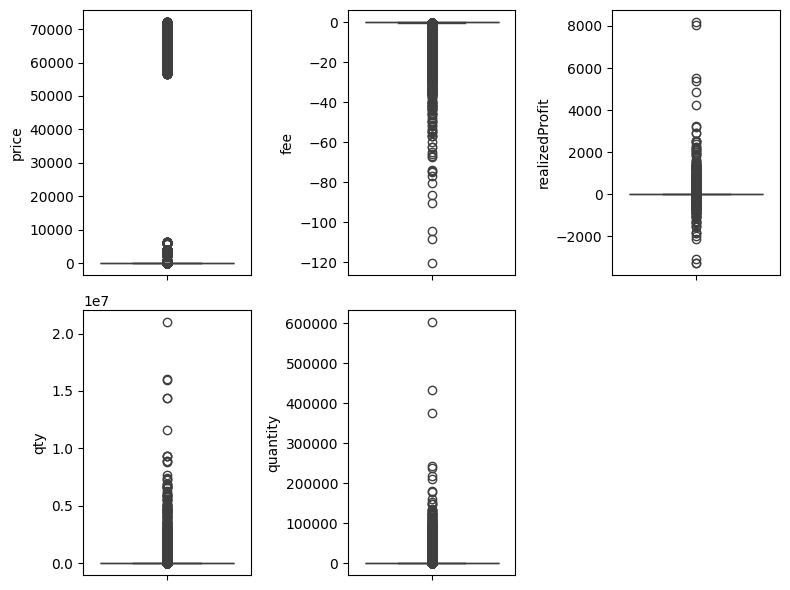

In [187]:
# Chart - 1 visualization code
f, ax = plt.subplots(figsize =(8, 6))

plt.subplot(2,3,1)
sns.boxplot(final_df['price'])

plt.subplot(2,3,2)
sns.boxplot(final_df['fee'])

plt.subplot(2,3,3)
sns.boxplot(final_df['realizedProfit'])

plt.subplot(2,3,4)
sns.boxplot(final_df['qty'])

plt.subplot(2,3,5)
sns.boxplot(final_df['quantity'])

plt.tight_layout()
plt.show()

REMARK: Massive Outliers are there in this dataset

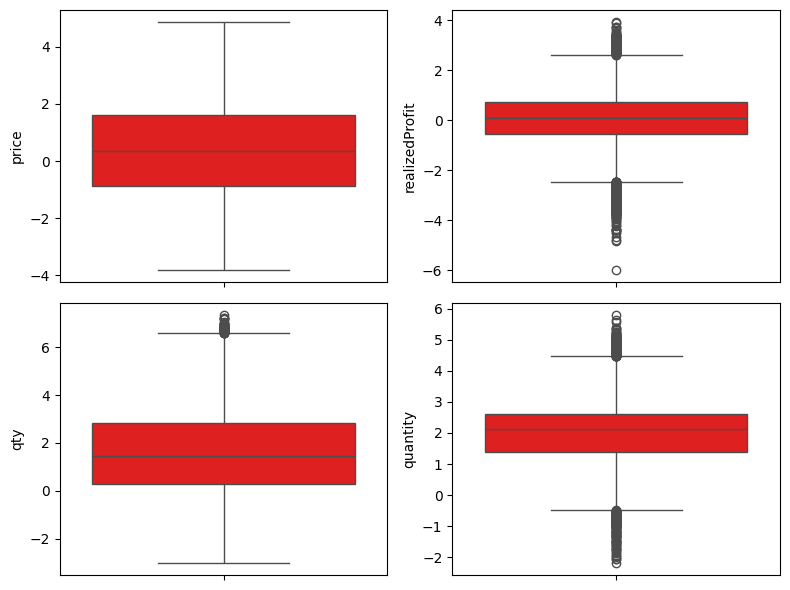

In [188]:
# Log transformation of variables
# Chart - 1.1 visualization code
f, ax = plt.subplots(figsize =(8, 6))

plt.subplot(2,2,1)
sns.boxplot(np.log10(final_df['price']), color = 'red')

#plt.subplot(2,2,2)
#sns.boxplot(np.log10(final_df['fee']))                        # Since all values are negative so log transformation will throw error

plt.subplot(2,2,2)
sns.boxplot(np.log10(final_df['realizedProfit']), color = 'red')

plt.subplot(2,2,3)
sns.boxplot(np.log10(final_df['qty']), color = 'red')

plt.subplot(2,2,4)
sns.boxplot(np.log10(final_df['quantity']), color = 'red')

plt.tight_layout()
plt.show()

REMARK: Log Transformation of boxplot shows significant outlier removal but not fully

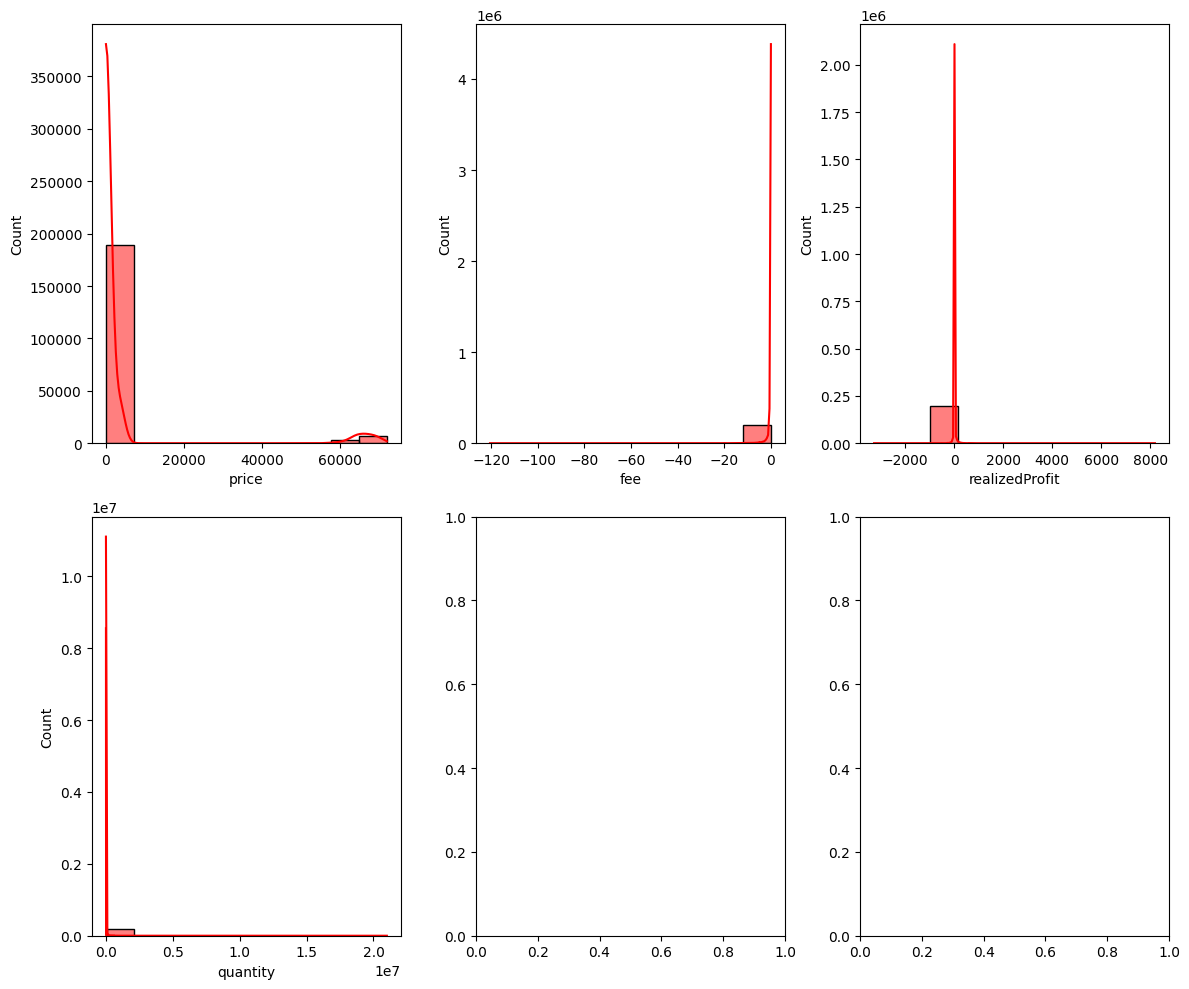

In [189]:
# Chart - 2 visualization code
f, ax = plt.subplots(figsize =(12, 10), nrows=2, ncols=3)

plt.subplot(2,3,1)
sns.histplot(final_df['price'], kde = True, bins = 10, ax=ax[0, 0], color = 'red')

plt.subplot(2,3,2)
sns.histplot(final_df['fee'], kde = True, bins = 10, ax=ax[0, 1], color = 'red')

plt.subplot(2,3,3)
sns.histplot(final_df['realizedProfit'], kde = True, bins = 10, ax=ax[0, 2], color = 'red')

plt.subplot(2,3,4)
sns.histplot(final_df['quantity'], kde = True, bins = 10, ax=ax[1, 0], color = 'red')

plt.subplot(2,3,4)
sns.histplot(final_df['qty'], kde = True, bins = 10, ax=ax[1, 0], color = 'red')

plt.tight_layout()
plt.show()

REMARK: All the variables are skewed and none of them are normally distributed

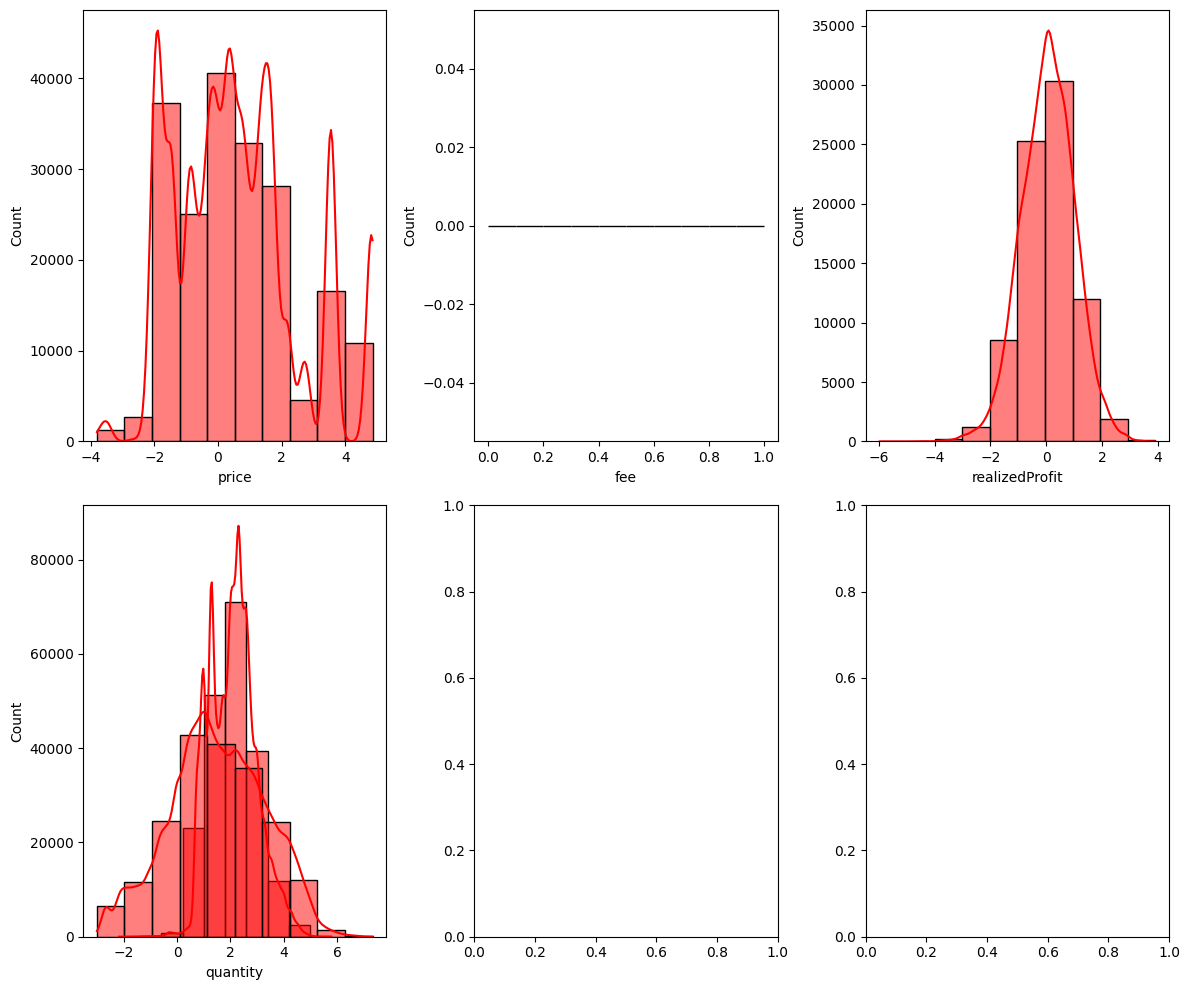

In [190]:
# Chart - 2 visualization code
f, ax = plt.subplots(figsize =(12, 10), nrows=2, ncols=3)

plt.subplot(2,3,1)
sns.histplot(np.log10(final_df['price']), kde = True, bins = 10, ax=ax[0, 0], color = 'red')

plt.subplot(2,3,2)
sns.histplot(np.log10(final_df['fee']), kde = True, bins = 10, ax=ax[0, 1], color = 'red')

plt.subplot(2,3,3)
sns.histplot(np.log10(final_df['realizedProfit']), kde = True, bins = 10, ax=ax[0, 2], color = 'red')

plt.subplot(2,3,4)
sns.histplot(np.log10(final_df['quantity']), kde = True, bins = 10, ax=ax[1, 0], color = 'red')

plt.subplot(2,3,4)
sns.histplot(np.log10(final_df['qty']), kde = True, bins = 10, ax=ax[1, 0], color = 'red')

plt.tight_layout()
plt.show()

# Bivariate Analysis

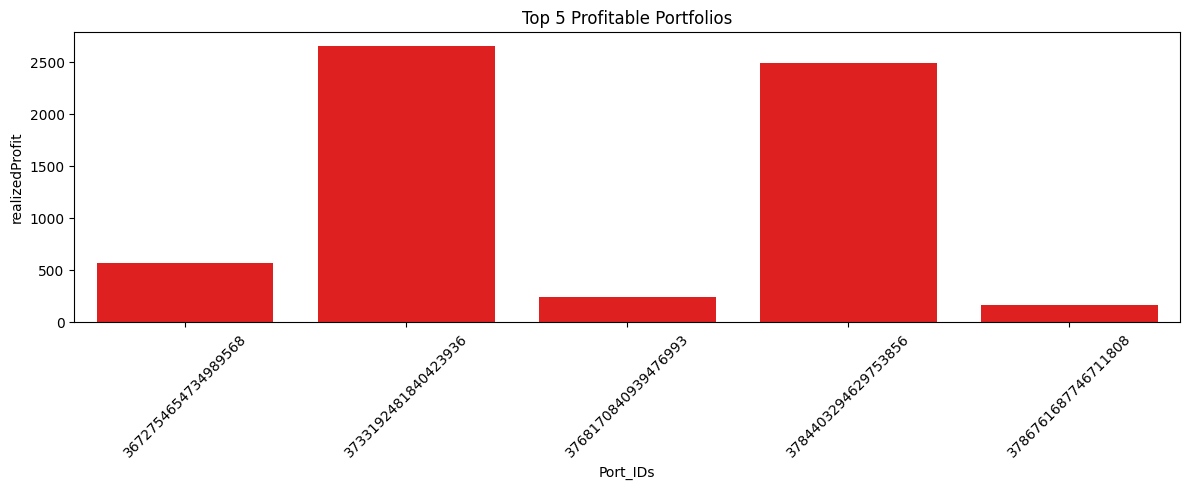

In [191]:
a = final_df.groupby('Port_IDs')['realizedProfit'].sum().reset_index().head()
plt.figure(figsize=(12, 5))
sns.barplot(x = a['Port_IDs'], y = a['realizedProfit'], color = 'red')
plt.title('Top 5 Profitable Portfolios')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

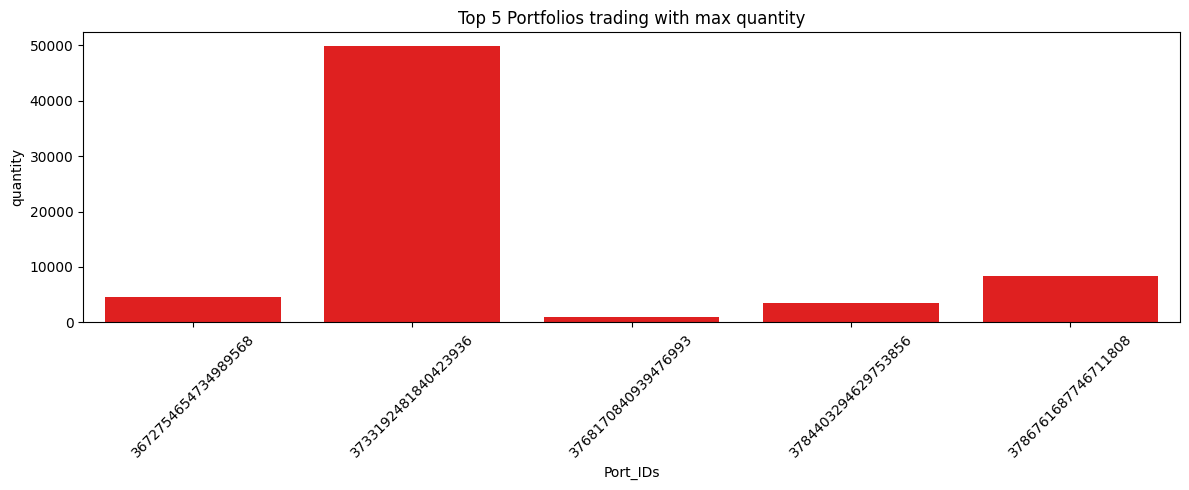

In [192]:
b = final_df.groupby('Port_IDs')['quantity'].max().reset_index().head()
plt.figure(figsize=(12, 5))
sns.barplot(x = b['Port_IDs'], y = b['quantity'], color = 'red')
plt.title('Top 5 Portfolios trading with max quantity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

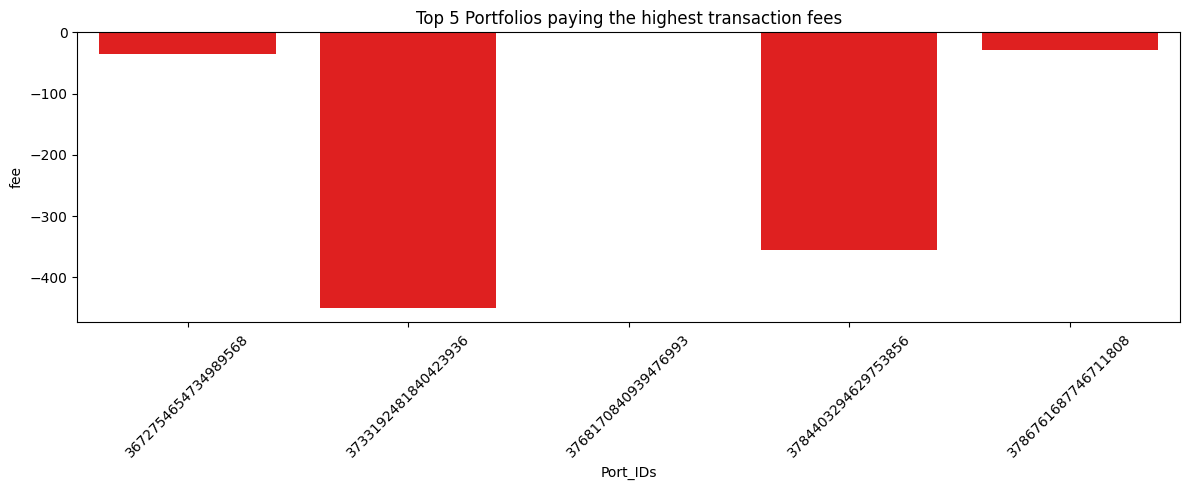

In [195]:
c = final_df.groupby('Port_IDs')['fee'].sum().reset_index().head()
plt.figure(figsize=(12, 5))
sns.barplot(x = c['Port_IDs'], y = c['fee'], color = 'red')
plt.title('Top 5 Portfolios paying the highest transaction fees')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

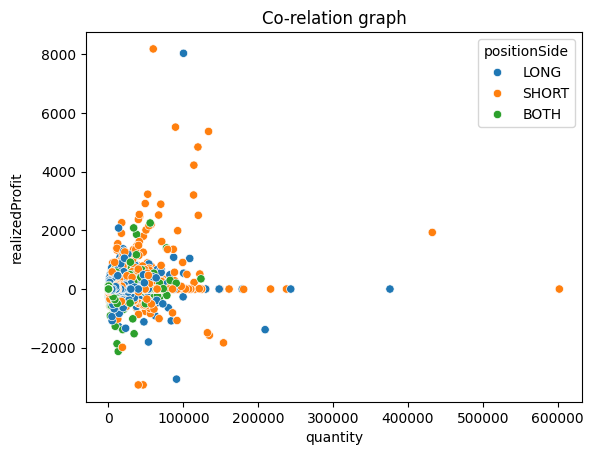

In [197]:
sns.scatterplot(x = final_df['quantity'], y = final_df['realizedProfit'], hue = final_df['positionSide'])
plt.title('Co-relation graph')
plt.show()

#Multivariate Analysis

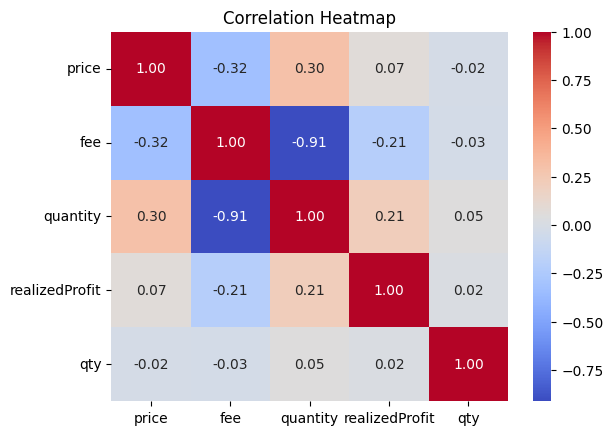

In [198]:
num = final_df[['price',	'fee',	'quantity',	'realizedProfit',	'qty']]
sns.heatmap(num.corr(), annot = True, cmap = 'coolwarm', fmt = '.2f')
plt.title('Correlation Heatmap')
plt.show()

Remark: There is co-relation between price and quantity   ||   There is co relation between realised profit and quantity

#***Feature Engineering***

In [132]:
# No. of profitable positions
win_positions = final_df[final_df['realizedProfit'] > 0].shape[0]
win_positions

79473

In [200]:
# Calculating return on investment
final_df['Total_Profit'] = final_df.groupby('Port_IDs')['realizedProfit'].transform('sum')
final_df['Total_Investment'] = final_df.groupby('Port_IDs')['quantity'].transform('sum')
final_df['ROI'] = (final_df['Total_Profit'] / final_df['Total_Investment']) * 100

In [203]:
# Extract ROI for each Port_ID
roi = final_df.groupby('Port_IDs')['ROI'].first().reset_index()
roi.head(2)

,Port_IDs,ROI
0,3672754654734989568,0.480363
1,3733192481840423936,0.232470


In [202]:
# Calculating PnL (Profit and Loss)
pnl = final_df.groupby('Port_IDs')['realizedProfit'].sum().reset_index(name='PnL')
pnl.head(2)

,Port_IDs,PnL
0,3672754654734989568,565.547761
1,3733192481840423936,2653.591900


In [204]:
# Sharpe Ratio
# Assuming a risk-free rate (e.g., 0.02 for 2%)
risk_free_rate = 0.02
sharpe_ratio = final_df.groupby('Port_IDs')['realizedProfit'].agg(['mean', 'std']).reset_index()
sharpe_ratio['Sharpe_Ratio'] = (sharpe_ratio['mean'] - risk_free_rate) / sharpe_ratio['std']

In [205]:
sharpe_ratio.head(2)

,Port_IDs,mean,std,Sharpe_Ratio
0,3672754654734989568,1.226785,6.539488,0.184538
1,3733192481840423936,4.536055,76.261081,0.059218


In [206]:
# MDD (Maximum Drawdown)
def calculate_mdd(group):
    cumulative_returns = (1 + group['realizedProfit']).cumprod()
    peak = cumulative_returns.cummax()
    drawdown = (cumulative_returns - peak) / peak
    return drawdown.min()

mdd = final_df.groupby('Port_IDs').apply(calculate_mdd).reset_index(name='MDD')
mdd.head(2)

,Port_IDs,MDD
0,3672754654734989568,-3.182244e+09
1,3733192481840423936,-1.274226e+46


In [207]:
# Win Rate
win_rate = final_df.groupby('Port_IDs').agg(
    Wins=('realizedProfit', lambda x: (x > 0).sum()),
    Total_Positions=('realizedProfit', 'count')
).reset_index()

win_rate['Win_Rate'] = (win_rate['Wins'] / win_rate['Total_Positions']) * 100

In [208]:
win_rate.head(2)

,Port_IDs,Wins,Total_Positions,Win_Rate
0,3672754654734989568,206,461,44.685466
1,3733192481840423936,457,585,78.119658


In [210]:
# Win Position
win_positions = final_df.groupby('Port_IDs')['realizedProfit'].apply(lambda x: (x > 0).sum()).reset_index(name='Win_Positions')
win_positions.head(2)

,Port_IDs,Win_Positions
0,3672754654734989568,206
1,3733192481840423936,457


In [211]:
# Total positions
total_positions = final_df.groupby('Port_IDs')['realizedProfit'].count().reset_index(name='Total_Positions')
total_positions.head(2)

,Port_IDs,Total_Positions
0,3672754654734989568,461
1,3733192481840423936,585


#***Financial Metrics Preparation***

In [212]:
final_metrics = pnl.merge(roi[['Port_IDs', 'ROI']], on='Port_IDs', how ='left')
final_metrics = final_metrics.merge(sharpe_ratio[['Port_IDs', 'Sharpe_Ratio']], on='Port_IDs')
final_metrics = final_metrics.merge(mdd, on='Port_IDs')
final_metrics = final_metrics.merge(win_rate[['Port_IDs', 'Win_Rate']], on='Port_IDs')
final_metrics = final_metrics.merge(win_positions, on='Port_IDs')
final_metrics = final_metrics.merge(total_positions, on='Port_IDs')

# Rename columns for better clarity
final_metrics.rename(columns={'PnL': 'Total_PnL'}, inplace=True)

# Display final metrics DataFrame
final_metrics

,Port_IDs,Total_PnL,ROI,Sharpe_Ratio,MDD,Win_Rate,Win_Positions,Total_Positions
0,3672754654734989568,565.547761,0.480363,0.184538,-3.182244e+09,44.685466,206,461
1,3733192481840423936,2653.591900,0.232470,0.059218,-1.274226e+46,78.119658,457,585
2,3768170840939476993,243.668899,8.779089,0.423790,0.000000e+00,42.857143,6,14
3,3784403294629753856,2493.618898,0.340279,0.102385,-inf,30.293160,1767,5833
4,3786761687746711808,170.220200,0.282980,0.183987,-6.070130e+01,43.037975,34,79
...,...,...,...,...,...,...,...,...
144,4039279455324236544,1023.498387,1.027423,0.476358,0.000000e+00,55.161290,171,310
145,4040382575336130560,0.000000,0.000000,-inf,0.000000e+00,0.000000,0,70
146,4040843843196854529,2043.478100,0.965300,0.361849,0.000000e+00,27.083333,13,48
147,4041804592937345281,-796.682686,-0.142773,-0.085302,-1.382142e+03,22.727273,75,330


#***Ranking***

In [213]:
# Ranking by Total_PnL
final_metrics['PnL_Rank'] = final_metrics['Total_PnL'].rank(ascending=False)

# Ranking by ROI
final_metrics['ROI_Rank'] = final_metrics['ROI'].rank(ascending=False)

# Ranking by Sharpe Ratio
final_metrics['Sharpe_Ratio_Rank'] = final_metrics['Sharpe_Ratio'].rank(ascending=False)

# Ranking by Win Rate
final_metrics['Win_Rate_Rank'] = final_metrics['Win_Rate'].rank(ascending=False)


In [214]:
# Taking the mean of all ranks and assigning rank
final_metrics['Overall_Rank'] = (final_metrics[['PnL_Rank', 'ROI_Rank', 'Sharpe_Ratio_Rank', 'Win_Rate_Rank']].mean(axis=1).rank())
final_metrics = final_metrics.sort_values(by='Overall_Rank', ascending=True)
final_metrics

,Port_IDs,Total_PnL,ROI,Sharpe_Ratio,MDD,Win_Rate,Win_Positions,Total_Positions,PnL_Rank,ROI_Rank,Sharpe_Ratio_Rank,Win_Rate_Rank,Overall_Rank
62,3986814617275053313,15847.596344,0.859710,0.332713,0.000000e+00,77.905605,2641,3390,7.0,50.0,18.0,2.0,1.0
17,3907081197088384000,16986.456333,1.056086,0.216705,0.000000e+00,60.946596,2408,3951,5.0,39.0,58.0,7.0,2.0
32,3939318616482048768,9406.865606,1.012116,0.256786,-4.403488e+36,57.368421,109,190,17.0,44.0,40.0,9.0,3.0
16,3891020560590657281,2805.664191,1.759838,0.437396,0.000000e+00,66.908213,277,414,69.0,29.0,9.0,5.0,4.0
14,3886752488982104320,7122.138782,0.897133,0.223108,-inf,74.792013,899,1202,20.0,46.0,53.0,3.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,3858510226868015873,-237.663592,-0.030456,-0.013068,-3.663037e+10,27.221597,242,889,145.0,144.0,143.0,115.0,145.0
38,3944239644144231424,-1173.167078,-0.123910,-0.024396,-inf,27.149877,221,814,148.0,147.0,145.0,116.0,146.0
147,4041804592937345281,-796.682686,-0.142773,-0.085302,-1.382142e+03,22.727273,75,330,147.0,148.0,148.0,128.0,147.0
71,3995532094997544704,-12568.237944,-0.194058,-0.068966,-inf,21.310888,1190,5584,149.0,149.0,147.0,129.0,148.0


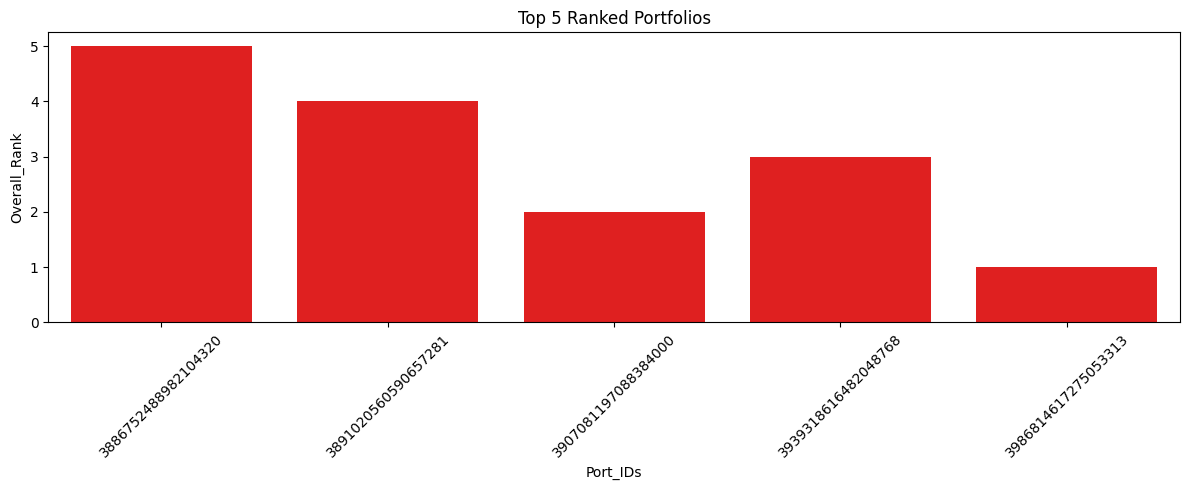

In [215]:
figure = final_metrics.head(5)
plt.figure(figsize=(12, 5))
sns.barplot(x = figure['Port_IDs'], y = figure['Overall_Rank'], color = 'red')
plt.title('Top 5 Ranked Portfolios')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [216]:
# List of top 20 accounts based on ranking
final_metrics[['Port_IDs', 'Overall_Rank']].head(20)

,Port_IDs,Overall_Rank
62,3986814617275053313,1.0
17,3907081197088384000,2.0
32,3939318616482048768,3.0
16,3891020560590657281,4.0
14,3886752488982104320,5.0
112,4029749871687083265,6.0
75,3999240873283311617,7.5
58,3977234346014419201,7.5
8,3826087012661391104,9.0
37,3944088772635000577,10.0


#***Conclusion***

##1. Methodology
Rank Calculation:

For each metric, a rank was calculated:
Total PnL, ROI, Sharpe Ratio, and Win Rate: Ranked in descending order (higher values are better).
Maximum Drawdown: Ranked in ascending order (lower values are better).
The ranks were computed using Pandas’ built-in ranking functionality.
Overall Rank Calculation:

An overall rank for each account was computed by averaging the ranks across all selected metrics.
The accounts were then sorted based on the overall rank in ascending order.
Result Presentation: The ranked accounts were displayed alongside their metrics for easy comparison.



##2. Findings
The analysis resulted in the following insights:

The top-performing accounts exhibit higher Total PnL, ROI, and Sharpe Ratios, reflecting effective management and profitable trades.

Accounts with lower Maximum Drawdown indicate better risk management and fewer significant losses.

Win Rate percentages highlight the proportion of profitable trades, suggesting effective trading strategies.



##3. Assumptions
The analysis is based on several assumptions:

Metric Relevance: The selected metrics (Total PnL, ROI, Sharpe Ratio, MDD, Win Rate) are considered relevant indicators of account performance.

Equal Weighting: Each metric is assumed to have equal importance in determining the overall rank, which may not reflect the nuances of trading strategies.

Static Risk-Free Rate: The Sharpe Ratio calculation assumes a constant risk-free rate, which may not hold true in dynamic market conditions. 0.02 (or 2%)

#***Download the calculation matrix dataset***

In [217]:
# CSV file containing calculated metrics
final_metrics.to_csv('final_metrics.csv', index=False)